<a href="https://colab.research.google.com/github/navya04062003/Stock_Price_Prediction/blob/main/Retail_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-8d7d76b0e1ea>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Warehouse_and_Retail_Sales.csv')


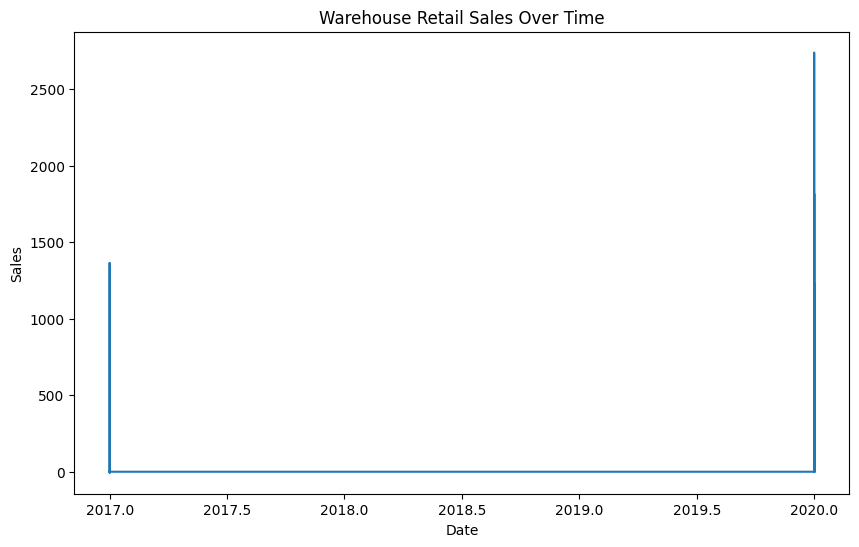

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/Warehouse_and_Retail_Sales.csv')

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df['RETAIL SALES'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Warehouse Retail Sales Over Time')
plt.show()

# Preprocess the data
# Assuming the dataset has 'date' and 'sales' columns
df['YEAR'] = pd.to_datetime(df['YEAR'])
df.set_index('YEAR', inplace=True)

# Scaling the sales data
scaler = MinMaxScaler(feature_range=(0, 1))
df['RETAIL SALES'] = scaler.fit_transform(df[['RETAIL SALES']])

# Convert the data to numpy arrays
data = df['RETAIL SALES'].values


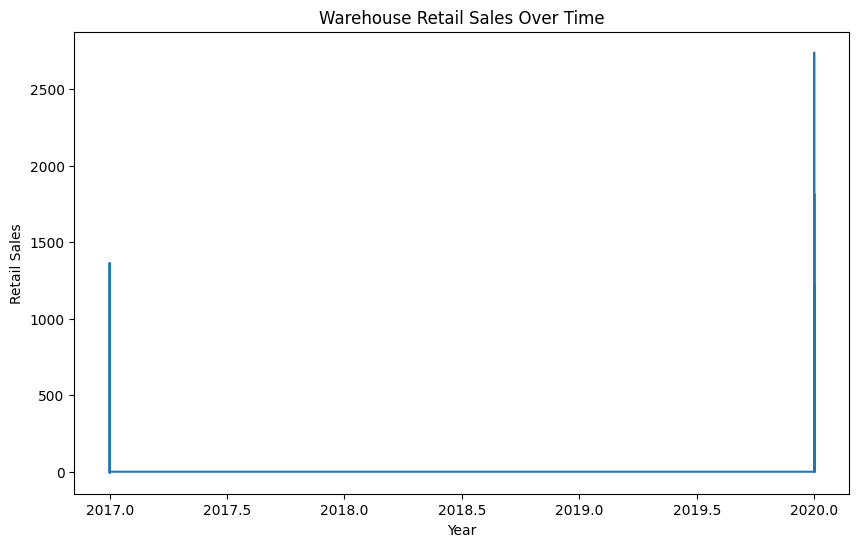

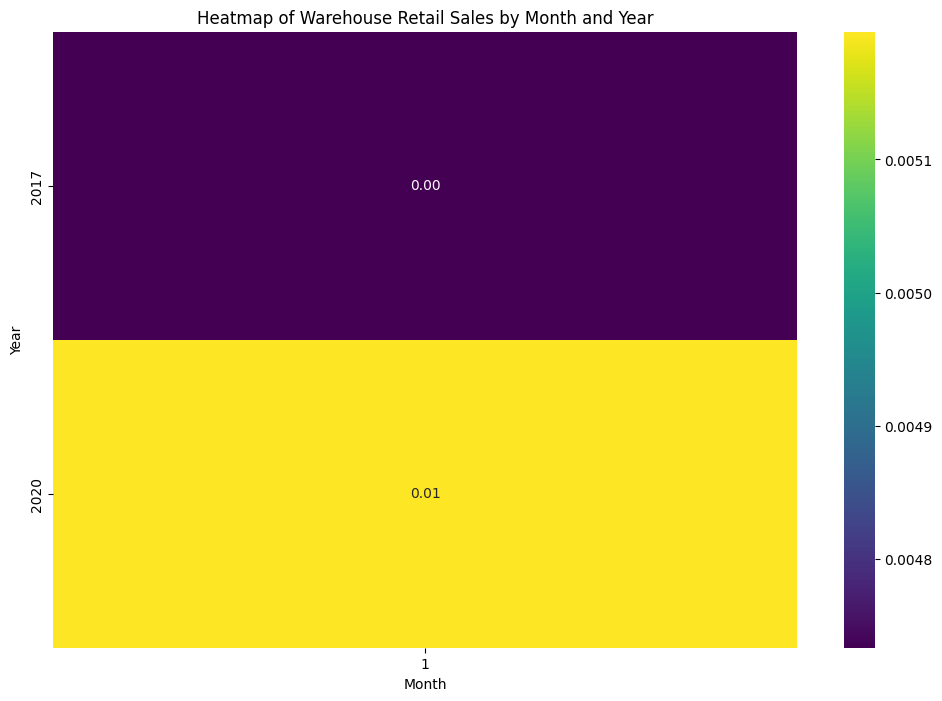

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/Warehouse_and_Retail_Sales.csv')

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.plot(df['YEAR'], df['RETAIL SALES'])
plt.xlabel('Year')
plt.ylabel('Retail Sales')
plt.title('Warehouse Retail Sales Over Time')
plt.show()

# Preprocess the data
# Convert 'YEAR' to datetime if it's not already in datetime format
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')  # assuming 'YEAR' is in YYYY format
df.set_index('YEAR', inplace=True)

# Scaling the sales data
scaler = MinMaxScaler(feature_range=(0, 1))
df['RETAIL SALES'] = scaler.fit_transform(df[['RETAIL SALES']])

# Extract year and month from the date (even though here it is just year)
df['year'] = df.index.year
df['month'] = df.index.month

# Create a pivot table with year as rows and month as columns
pivot_table = df.pivot_table(values='RETAIL SALES', index='year', columns='month', aggfunc=np.mean)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Warehouse Retail Sales by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [ ]:
#cleaning the data
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)
    df['YEAR'] = pd.to_datetime(df['YEAR'])
    df = df.sort_values('YEAR')
    df.set_index('YEAR', inplace=True)
    return df.dropna()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    data = df.filter(['RETAIL SALES'])
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

# Normalize the data
scaled_data, scaler = normalize_data(df)

In [ ]:
def split_data(scaled_data, train_size=0.7, val_size=0.15):
    train_len = int(len(scaled_data) * train_size)
    val_len = int(len(scaled_data) * val_size)
    train_data = scaled_data[:train_len]
    val_data = scaled_data[train_len:train_len + val_len]
    test_data = scaled_data[train_len + val_len:]
    return train_data, val_data, test_data

# Split the data
train_data, val_data, test_data = split_data(scaled_data)


In [ ]:
import numpy as np
def prepare_data(data, time_step=60):
    x, y = [], []
    for i in range(time_step, len(data)):
        x.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    x, y = np.array(x), np.array(y)
    x = np.reshape(x, (x.shape[0], x.shape[1], 1))
    return x, y

# Prepare training data
x_train, y_train = prepare_data(train_data)

# Prepare validation data
x_val, y_val = prepare_data(val_data)

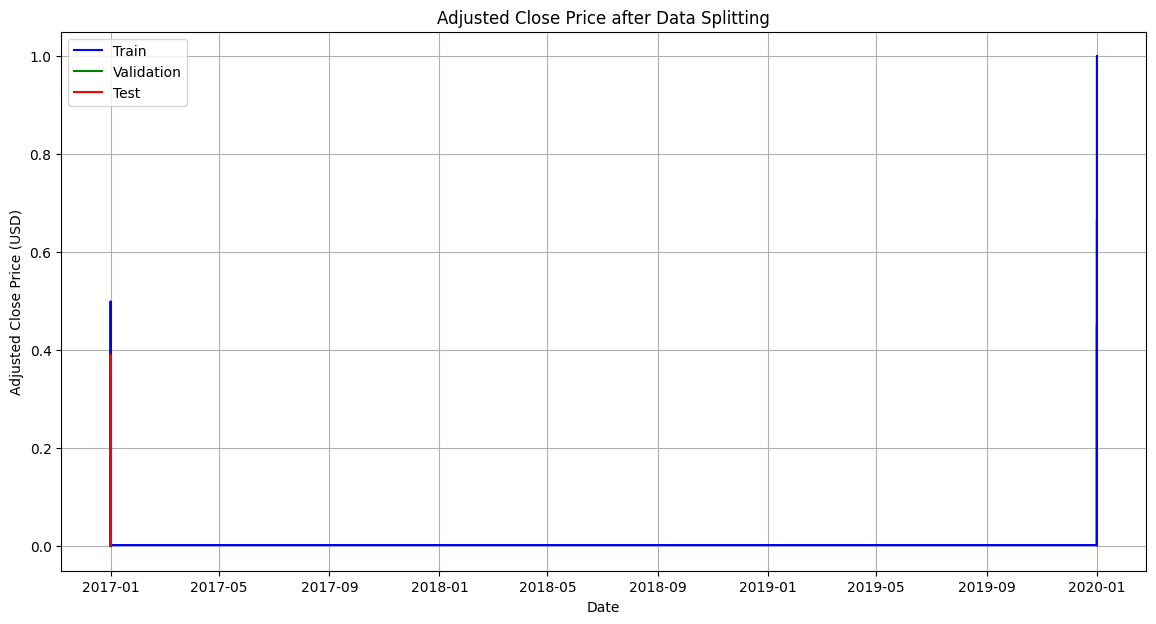

In [ ]:
# Plotting the data after splitting
plt.figure(figsize=(14, 7))

# Plot training data
plt.plot(df.index[:len(train_data)], train_data, label='Train', color='blue')

# Plot validation data
plt.plot(df.index[len(train_data):len(train_data) + len(val_data)], val_data, label='Validation', color='green')

# Plot test data
plt.plot(df.index[len(train_data) + len(val_data):], test_data, label='Test', color='red')

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.title('Adjusted Close Price after Data Splitting')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.regularizers import l2

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=60, return_sequences=True))
model.add(LSTM(units=60, return_sequences=False))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=40, batch_size=640, validation_data=(x_val, y_val), verbose=1)

Epoch 1/40
104/104 [==============================] - 83s 797ms/step - loss: nan - val_loss: nan
Epoch 2/40
104/104 [==============================] - 82s 790ms/step - loss: nan - val_loss: nan
Epoch 3/40
104/104 [==============================] - 81s 783ms/step - loss: nan - val_loss: nan
Epoch 4/40
104/104 [==============================] - 82s 788ms/step - loss: nan - val_loss: nan
Epoch 5/40
104/104 [==============================] - 81s 784ms/step - loss: nan - val_loss: nan
Epoch 6/40
104/104 [==============================] - 81s 784ms/step - loss: nan - val_loss: nan
Epoch 7/40
104/104 [==============================] - 81s 782ms/step - loss: nan - val_loss: nan
Epoch 8/40
104/104 [==============================] - 81s 783ms/step - loss: nan - val_loss: nan
Epoch 9/40
104/104 [==============================] - 81s 779ms/step - loss: nan - val_loss: nan
Epoch 10/40
104/104 [==============================] - 81s 779ms/step - loss: nan - val_loss: nan
Epoch 11/40
104/104 [========

441/441 [==============================] - 13s 28ms/step


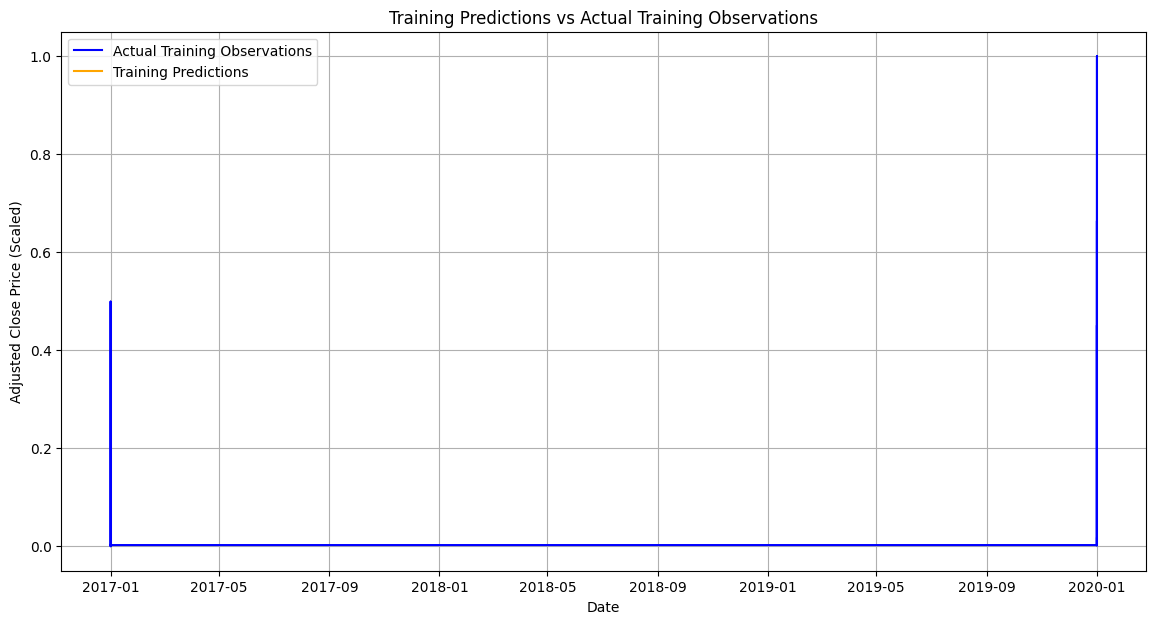

In [ ]:
# Make predictions on training data
train_predictions = model.predict(x_train)

# Prepare testing data and corresponding actual values
x_test, y_test_actual = prepare_data(test_data)

# Make predictions on test data
test_predictions = model.predict(x_test)

# Inverse transform predictions and actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test_actual.reshape(-1, 1))

# Plot training predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(df.index[60:60+len(y_train_actual)], y_train_actual, label='Actual Training Observations', color='blue')
plt.plot(df.index[60:60+len(train_predictions)], train_predictions, label='Training Predictions', color='orange')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (Scaled)')
plt.title('Training Predictions vs Actual Training Observations')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
# Make predictions on training data
train_predictions = model.predict(x_train)

# Prepare testing data and corresponding actual values
def prepare_testing_data(test_data, time_step=60):
    x_test = []
    for i in range(time_step, len(test_data)):
        x_test.append(test_data[i-time_step:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    return x_test, test_data[time_step:]

# Prepare testing data and corresponding actual values
x_test, y_test_actual = prepare_testing_data(test_data)

# Make predictions on test data
test_predictions = model.predict(x_test)

def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    return rmse, mse

# Calculate RMSE and MSE for training data
train_rmse, train_mse = calculate_metrics(y_train, train_predictions)
print(f'Training RMSE(Root mean squared error): {train_rmse}')
print(f'Training MSE(Mean squared error): {train_mse}')

# Calculate RMSE and MSE for test data
test_rmse, test_mse = calculate_metrics(y_test_actual, test_predictions)
print(f'Test RMSE(Root mean squared error): {test_rmse}')
print(f'Test MSE(Mean squared error): {test_mse}')


441/441 [==============================] - 12s 27ms/step


ValueError: Input contains NaN.